In [39]:
import csv
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib.ticker import AutoMinorLocator, NullFormatter, MultipleLocator
import scipy as sp
from scipy.optimize import fsolve
import math

In [2]:
#myFile = np.genfromtxt('temp.csv', delimiter=',')
myFile = np.genfromtxt('CO2_S1_corrected_30min_2.csv', delimiter=',')

In [6]:
h = 105216
c1 = [0] * h
data = [0] * h
time = [0] * h

In [7]:
for i in range(h):
    c1[i] = myFile[i+1][6]
    time[i] = i + 1
    data[i] = (i+1)/(48*365) + 2011.5

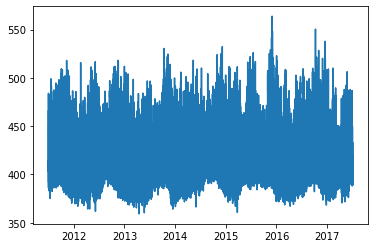

In [8]:
plt.plot(data,c1)
plt.show()

# усреднение за дневной период

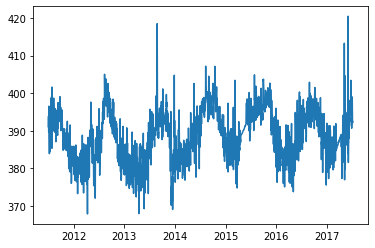

In [180]:
H = 2192
dateonday = [0] * H
day = [0] * H
for i in range(H):
    for k in range(48):
        if (myFile[48*i+k][5] == 13):
            for g in range(8):
                dateonday[i] += myFile[48*i+k+g][6]
    dateonday[i] /= 8
    day[i] = (i+1)/(365) + 2011.5
plt.plot(day,dateonday)

In [181]:
raw_data = {'t':day,'data':dateonday}

df = pd.DataFrame(raw_data, columns=['t', 'data'])
df.to_csv('усредненные за дневной период данные.csv')

c:\users\валентин\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  """Entry point for launching an IPython kernel.
c:\users\валентин\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  


Параметры модели: [ 7.88483853e-01 -1.19957620e+03]
 
0.7885 x - 1200


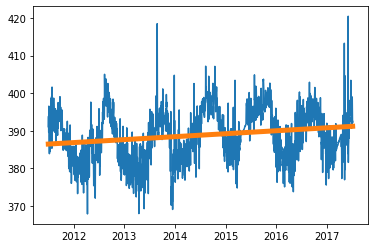

In [182]:
fx = sp.linspace(day[0], day[-1], 1000)
fp, residuals, rank, sv, rcond = sp.polyfit(day, dateonday, 1, full=True)
print("Параметры модели: %s" % fp)
#функция-полином, если её напечатать, то увидите математическое выражение
f = sp.poly1d(fp)
print(f)
#рисуем график модельной функции

plt.plot(day,dateonday)
plt.plot(fx, f(fx), linewidth=5)
plt.show()

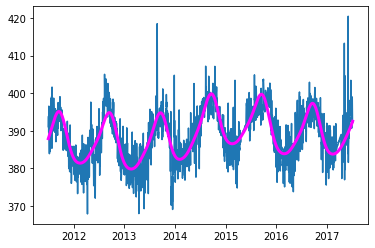

In [183]:
w1 = [0.00273722628, 3.11045226, 6.02397646] #частота, косинус, синус #365.3
w2 = [0.00547445255, -1.43379092, 0.344517401] #182.66
#w3 = [0.0109489051, -0.744202034, 0.361427684] #91.33
w4 = [0.00821167883, -0.079021297, -0.342126919] #121.77
w5 = [0.00045620438, -0.982489433, -1.00926083] #2192
w6 = [0.000912408759, 0.720728816, 1.6245552] #1096


func= [0] * H
for i in range(H):
    func[i] = w1[1] * math.cos(2* math.pi *w1[0] * (i+1)) + w1[2] * math.sin(2* math.pi *w1[0] * (i+1))
    func[i] += w2[1] * math.cos(2* math.pi *w2[0] * (i+1)) + w2[2] * math.sin(2* math.pi *w2[0] * (i+1))
    #func[i] += w3[1] * math.cos(2* math.pi *w3[0] * (i+1)) + w3[2] * math.sin(2* math.pi *w3[0] * (i+1))
    func[i] += w4[1] * math.cos(2* math.pi *w4[0] * (i+1)) + w4[2] * math.sin(2* math.pi *w4[0] * (i+1))
    func[i] += w5[1] * math.cos(2* math.pi *w5[0] * (i+1)) + w5[2] * math.sin(2* math.pi *w5[0] * (i+1))
    func[i] += w6[1] * math.cos(2* math.pi *w6[0] * (i+1)) + w6[2] * math.sin(2* math.pi *w6[0] * (i+1))
    func[i] += fp[0] * (i+1)/365 + fp[1] + 2011.5*fp[0]

plt.plot(day,dateonday)
plt.plot(day,func, color = 'magenta', linewidth=3)
plt.show()

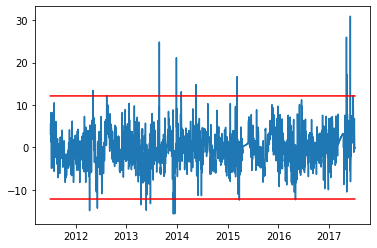

In [184]:
hist1 = [0] * H
for i in range(H):
    hist1[i] = dateonday[i] - func[i]

st_err = np.std(hist1)

f1 = [0] * H
f2 = [0] * H

for i in range(H):
    f1[i] = 3 * st_err
    f2[i] = -3 * st_err

plt.plot(day,hist1)
plt.plot(day,f1, color = 'red')
plt.plot(day,f2, color = 'red')
#plt.plot(day,func, color = 'magenta', linewidth=3)
plt.show()

23


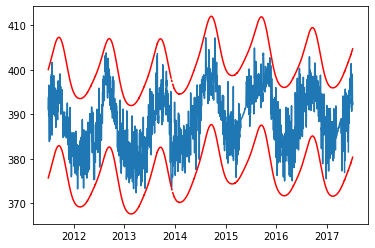

In [185]:
fverh = [0] * H
fniz = [0] * H
geiger = 0
for i in range(H):
    fverh[i] = func[i] + 3 * st_err
    fniz[i] = func[i] - 3 * st_err
    if ((dateonday[i] > fverh[i]) or (dateonday[i] < fniz[i])):
        geiger += 1
        dateonday[i] = np.nan
        day[i] = np.nan

print(geiger)

plt.plot(day, dateonday)
plt.plot(day,fverh, color = 'red')
plt.plot(day,fniz, color = 'red')

In [186]:
dateonday1 = []
day1 = []

for i in range(H):
    if dateonday[i] > 0 :
        dateonday1.append(dateonday[i])
        day1.append(day[i])
        

c:\users\валентин\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  """Entry point for launching an IPython kernel.
c:\users\валентин\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  


Параметры модели: [ 7.45549121e-01 -1.11307571e+03]
 
0.7455 x - 1113


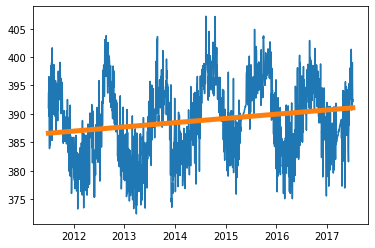

In [187]:
fx = sp.linspace(day1[0], day1[-1], 1000)
fp, residuals, rank, sv, rcond = sp.polyfit(day1, dateonday1, 1, full=True)
print("Параметры модели: %s" % fp)
#функция-полином, если её напечатать, то увидите математическое выражение
f = sp.poly1d(fp)
print(f)
#рисуем график модельной функции

plt.plot(day1,dateonday1)
plt.plot(fx, f(fx), linewidth=5)
plt.show()

In [188]:
raw_data = {'t':day,'data':dateonday}

df = pd.DataFrame(raw_data, columns=['t', 'data'])
df.to_csv('усредненные за дневной период данные1.csv')

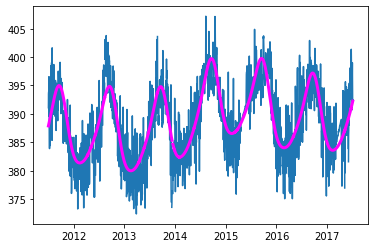

In [189]:
w1 = [0.00273722628, 3.06755022, 6.04457966] #частота, косинус, синус #365.3
w2 = [0.00547445255, -1.43090199,0.345514709] #182.66
#w3 = [0.0109489051, -0.65798011, 0.349691568] #91.33
w4 = [0.00821167883, -0.023843689, -0.287738709] #121.77
w5 = [0.00045620438, -1.04105835, -1.06548936] #2192
w6 = [0.000912408759, 0.601577885, 1.58902673] #1096


func= [0] * H
for i in range(H):
    func[i] = w1[1] * math.cos(2* math.pi *w1[0] * (i+1)) + w1[2] * math.sin(2* math.pi *w1[0] * (i+1))
    func[i] += w2[1] * math.cos(2* math.pi *w2[0] * (i+1)) + w2[2] * math.sin(2* math.pi *w2[0] * (i+1))
    #func[i] += w3[1] * math.cos(2* math.pi *w3[0] * (i+1)) + w3[2] * math.sin(2* math.pi *w3[0] * (i+1))
    func[i] += w4[1] * math.cos(2* math.pi *w4[0] * (i+1)) + w4[2] * math.sin(2* math.pi *w4[0] * (i+1))
    func[i] += w5[1] * math.cos(2* math.pi *w5[0] * (i+1)) + w5[2] * math.sin(2* math.pi *w5[0] * (i+1))
    func[i] += w6[1] * math.cos(2* math.pi *w6[0] * (i+1)) + w6[2] * math.sin(2* math.pi *w6[0] * (i+1))
    func[i] += fp[0] * (i+1)/365 + fp[1] + 2011.5*fp[0]

plt.plot(day,dateonday)
plt.plot(day,func, color = 'magenta', linewidth=3)
plt.show()

3.6986042546390467


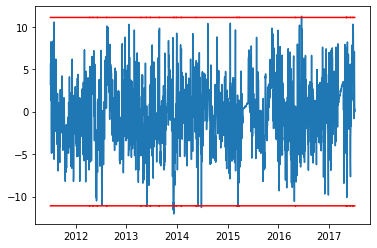

In [190]:
hist1 = []
dayh = []
for i in range(H):
    if dateonday[i] > 0:
        hist1.append(dateonday[i] - func[i])
        dayh.append(day[i])

st_err = np.std(hist1)
print(st_err)

f1 = [0] * H
f2 = [0] * H

for i in range(H):
    f1[i] = 3 * st_err
    f2[i] = -3 * st_err

plt.plot(dayh,hist1)
plt.plot(day,f1, color = 'red')
plt.plot(day,f2, color = 'red')
#plt.plot(day,func, color = 'magenta', linewidth=3)
plt.show()

8


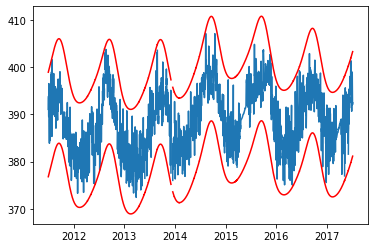

In [191]:
fverh = [0] * H
fniz = [0] * H
geiger = 0
for i in range(H):
    fverh[i] = func[i] + 3 * st_err
    fniz[i] = func[i] - 3 * st_err
    if ((dateonday[i] > fverh[i]) or (dateonday[i] < fniz[i])):
        geiger += 1
        dateonday[i] = np.nan
        day[i] = np.nan

print(geiger)

plt.plot(day, dateonday)
plt.plot(day,fverh, color = 'red')
plt.plot(day,fniz, color = 'red')

In [192]:
dateonday1 = []
day1 = []

for i in range(H):
    if dateonday[i] > 0 :
        dateonday1.append(dateonday[i])
        day1.append(day[i])

c:\users\валентин\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  """Entry point for launching an IPython kernel.
c:\users\валентин\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  


Параметры модели: [ 7.37596494e-01 -1.09701764e+03]
 
0.7376 x - 1097


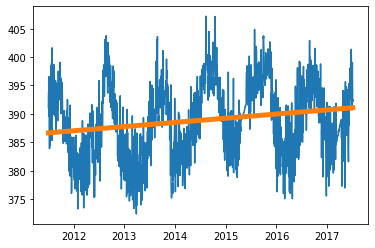

In [193]:
fx = sp.linspace(day1[0], day1[-1], 1000)
fp, residuals, rank, sv, rcond = sp.polyfit(day1, dateonday1, 1, full=True)
print("Параметры модели: %s" % fp)
#функция-полином, если её напечатать, то увидите математическое выражение
f = sp.poly1d(fp)
print(f)
#рисуем график модельной функции

plt.plot(day1,dateonday1)
plt.plot(fx, f(fx), linewidth=5)
plt.show()

In [194]:
raw_data = {'t':day,'data':dateonday}

df = pd.DataFrame(raw_data, columns=['t', 'data'])
df.to_csv('усредненные за дневной период данные2.csv')

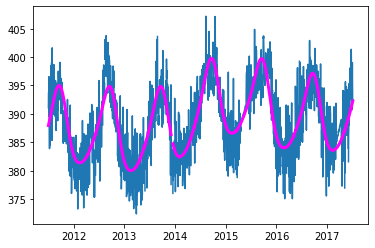

In [195]:
w1 = [0.00273722628, 3.07490563, 6.0326324] #частота, косинус, синус #365.3
w2 = [0.00547445255, -1.42099914,0.330361962] #182.66
#w3 = [0.0109489051, -0.659577835, 0.323445952] #91.33
w4 = [0.00821167883, -0.0163466257, -0.2898954] #121.77
w5 = [0.00045620438, -1.07587517, -1.06113261] #2192
w6 = [0.000912408759, 0.623546668, 1.58482886] #1096


func= [0] * H
for i in range(H):
    func[i] = w1[1] * math.cos(2* math.pi *w1[0] * (i+1)) + w1[2] * math.sin(2* math.pi *w1[0] * (i+1))
    func[i] += w2[1] * math.cos(2* math.pi *w2[0] * (i+1)) + w2[2] * math.sin(2* math.pi *w2[0] * (i+1))
    #func[i] += w3[1] * math.cos(2* math.pi *w3[0] * (i+1)) + w3[2] * math.sin(2* math.pi *w3[0] * (i+1))
    func[i] += w4[1] * math.cos(2* math.pi *w4[0] * (i+1)) + w4[2] * math.sin(2* math.pi *w4[0] * (i+1))
    func[i] += w5[1] * math.cos(2* math.pi *w5[0] * (i+1)) + w5[2] * math.sin(2* math.pi *w5[0] * (i+1))
    func[i] += w6[1] * math.cos(2* math.pi *w6[0] * (i+1)) + w6[2] * math.sin(2* math.pi *w6[0] * (i+1))
    func[i] += fp[0] * (i+1)/365 + fp[1] + 2011.5*fp[0]

plt.plot(day,dateonday)
plt.plot(day,func, color = 'magenta', linewidth=3)
plt.show()

3.641033427111553


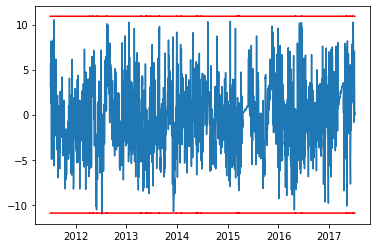

In [196]:
hist1 = []
dayh = []
for i in range(H):
    if dateonday[i] > 0:
        hist1.append(dateonday[i] - func[i])
        dayh.append(day[i])

st_err = np.std(hist1)
print(st_err)

f1 = [0] * H
f2 = [0] * H

for i in range(H):
    f1[i] = 3 * st_err
    f2[i] = -3 * st_err

plt.plot(dayh,hist1)
plt.plot(day,f1, color = 'red')
plt.plot(day,f2, color = 'red')
#plt.plot(day,func, color = 'magenta', linewidth=3)
plt.show()

1


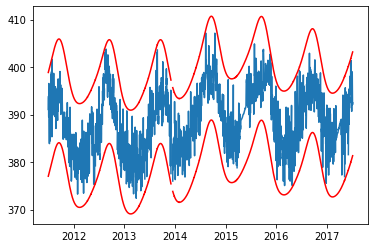

In [197]:
fverh = [0] * H
fniz = [0] * H
geiger = 0
for i in range(H):
    fverh[i] = func[i] + 3 * st_err
    fniz[i] = func[i] - 3 * st_err
    if ((dateonday[i] > fverh[i]) or (dateonday[i] < fniz[i])):
        geiger += 1
        dateonday[i] = np.nan
        day[i] = np.nan

print(geiger)

plt.plot(day, dateonday)
plt.plot(day,fverh, color = 'red')
plt.plot(day,fniz, color = 'red')

In [198]:
dateonday1 = []
day1 = []

for i in range(H):
    if dateonday[i] > 0 :
        dateonday1.append(dateonday[i])
        day1.append(day[i])

c:\users\валентин\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  """Entry point for launching an IPython kernel.
c:\users\валентин\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  


Параметры модели: [ 7.34777133e-01 -1.09133374e+03]
 
0.7348 x - 1091


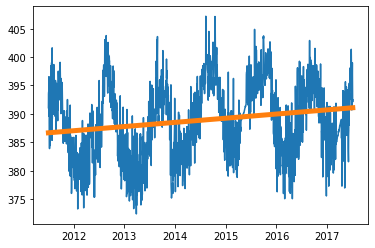

In [199]:
fx = sp.linspace(day1[0], day1[-1], 1000)
fp, residuals, rank, sv, rcond = sp.polyfit(day1, dateonday1, 1, full=True)
print("Параметры модели: %s" % fp)
#функция-полином, если её напечатать, то увидите математическое выражение
f = sp.poly1d(fp)
print(f)
#рисуем график модельной функции

plt.plot(day1,dateonday1)
plt.plot(fx, f(fx), linewidth=5)
plt.show()

In [200]:
raw_data = {'t':day,'data':dateonday}

df = pd.DataFrame(raw_data, columns=['t', 'data'])
df.to_csv('усредненные за дневной период данные3.csv')

PermissionError: [Errno 13] Permission denied: 'усредненные за дневной период данные3.csv'

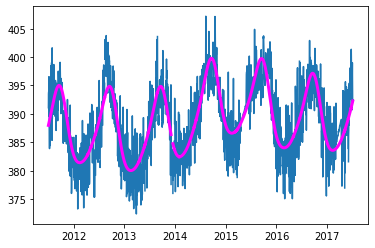

In [201]:
w1 = [0.00273722628, 3.07954113, 6.0325959] #частота, косинус, синус #365.3
w2 = [0.00547445255, -1.4164298,0.331019847] #182.66
#w3 = [0.0109489051, -0.655269978, 0.325095123] #91.33
w4 = [0.00821167883, -0.0118868419, -0.288715074] #121.77
w5 = [0.00045620438, -1.07361434, -1.05999879] #2192
w6 = [0.000912408759, 0.621081633, 1.58731791] #1096


func= [0] * H
for i in range(H):
    func[i] = w1[1] * math.cos(2* math.pi *w1[0] * (i+1)) + w1[2] * math.sin(2* math.pi *w1[0] * (i+1))
    func[i] += w2[1] * math.cos(2* math.pi *w2[0] * (i+1)) + w2[2] * math.sin(2* math.pi *w2[0] * (i+1))
    #func[i] += w3[1] * math.cos(2* math.pi *w3[0] * (i+1)) + w3[2] * math.sin(2* math.pi *w3[0] * (i+1))
    func[i] += w4[1] * math.cos(2* math.pi *w4[0] * (i+1)) + w4[2] * math.sin(2* math.pi *w4[0] * (i+1))
    func[i] += w5[1] * math.cos(2* math.pi *w5[0] * (i+1)) + w5[2] * math.sin(2* math.pi *w5[0] * (i+1))
    func[i] += w6[1] * math.cos(2* math.pi *w6[0] * (i+1)) + w6[2] * math.sin(2* math.pi *w6[0] * (i+1))
    func[i] += fp[0] * (i+1)/365 + fp[1] + 2011.5*fp[0]

plt.plot(day,dateonday)
plt.plot(day,func, color = 'magenta', linewidth=3)
plt.show()

# графики

## с трендом

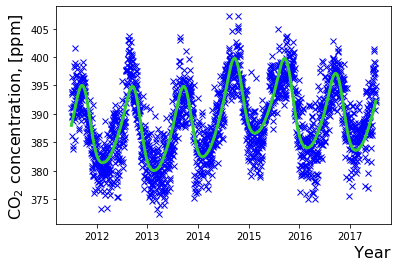

In [206]:
day_graph = [0] * H
for i in range(H): 
    day_graph[i] = (i+1)/(365) + 2011.5
plt.plot(day_graph,dateonday, 'x',  color = 'blue')
#plt.plot(day,linia, color ='red', linewidth=3)
plt.plot(day_graph,func, color = 'limegreen', linewidth=3)
plt.ylabel('СО$_{2}$ concentration, [ppm] ', size=16)
plt.xlabel('                                                          Year',size=16)

#plt.savefig('график c линейным трендом.png', dpi=600) 
plt.show()

## без тренда

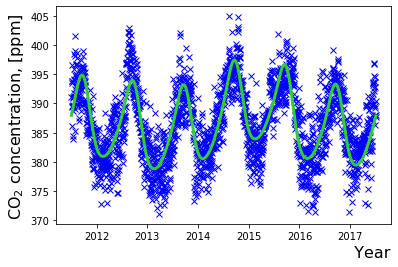

In [209]:
day_graph = [0] * H
func1 = [0] * H
dateonday1 = [0] * H
for i in range(H): 
    day_graph[i] = (i+1)/(365) + 2011.5
    func1[i] = func[i] - fp[0] * (i+1)/365
    dateonday1[i] = dateonday[i] - fp[0] * (i+1)/365
plt.plot(day_graph,dateonday1, 'x',  color = 'blue')
#plt.plot(day,linia, color ='red', linewidth=3)
plt.plot(day_graph,func1, color = 'limegreen', linewidth=3)
plt.ylabel('СО$_{2}$ concentration, [ppm] ', size=16)
plt.xlabel('                                                          Year',size=16)

plt.savefig('график без линейного тренда.png', dpi=600) 
plt.show()

## сезонный ход

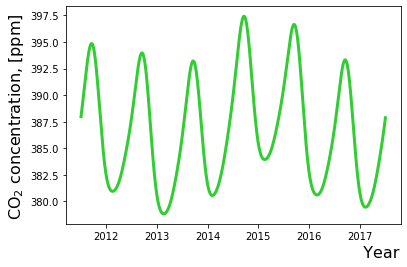

In [234]:
day_graph = [0] * H
func1 = [0] * H
dateonday1 = [0] * H

w5 = [0.00045620438, -1.07361434, -1.05999879] #2192
w6 = [0.000912408759, 0.621081633, 1.58731791] #1096


for i in range(H): 
    day_graph[i] = (i+1)/(365) + 2011.5
    func1[i] = func[i] - fp[0] * (i+1)/365
    dateonday1[i] = dateonday[i] - fp[0] * (i+1)/365
    #func1[i] -= w5[1] * math.cos(2* math.pi *w5[0] * (i+1)) + w5[2] * math.sin(2* math.pi *w5[0] * (i+1))
    #func1[i] -= w6[1] * math.cos(2* math.pi *w6[0] * (i+1)) + w6[2] * math.sin(2* math.pi *w6[0] * (i+1))
    
#plt.plot(day_graph,dateonday1, 'x',  color = 'blue')
#plt.plot(day,linia, color ='red', linewidth=3)
plt.plot(day_graph,func1, color = 'limegreen', linewidth=3)
plt.ylabel('СО$_{2}$ concentration, [ppm] ', size=16)
plt.xlabel('                                                          Year',size=16)

plt.savefig('график сезонного хода c гармониками относящимися к долгосрочному тренду.png', dpi=600) 
plt.show()

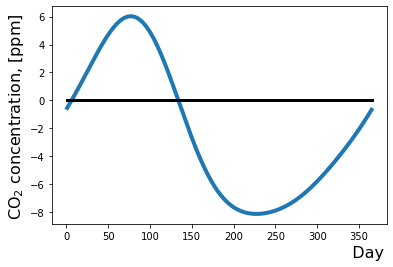

In [238]:
year = [0] * 365
dd = [0] * 365
for i in range(365):
    dd[i] = i+1
    year[i] = (func1[i] + func1[i+365] + func1[i+365*2] + func1[i+365*3] + func1[i+365*4] + func1[i+365*5]) / 6 - (fp[1] + 2014.5*fp[0])


black_li = [0] * 365
    
plt.plot(dd,year,  linewidth=4) #color = 'limegreen',
plt.plot(dd,black_li, color = 'black', linewidth=3)
plt.ylabel('СО$_{2}$ concentration, [ppm] ', size=16)
plt.xlabel('                                                          Day',size=16)

plt.savefig('график сезонного хода c гармониками относящимися к долгосрочному тренду среднее за все года.png', dpi=600) 
plt.show()

# максимумы минимумы фазы

In [246]:
print('2012')
print(max(year1), min(year1), max(year1) - min(year1))
print('2013')
print(max(year2), min(year2), max(year2) - min(year2))
print('2014')
print(max(year3), min(year3), max(year3) - min(year3))
print('2015')
print(max(year4), min(year4), max(year4) - min(year4))
print('2016')
print(max(year5), min(year5), max(year5) - min(year5))
print('2017')
print(max(year6), min(year6), max(year6) - min(year6))

2012
5.983159118039964 -7.923901632076536 13.9070607501165
2013
5.0984287972658535 -10.045600471898183 15.144029269164037
2014
4.339030268757654 -8.316327487465855 12.65535775622351
2015
8.545857748256651 -4.930693704602277 13.476551452858928
2016
7.77494708336576 -8.266913412368922 16.04186049573468
2017
4.445013660636221 -9.412061805071232 13.857075465707453


In [248]:
k = [0] * 6
for i in range(365):
    if (year1[i] < 0):
        k[0] += 1
    if (year2[i] <0):
        k[1] += 1
    if (year3[i] < 0):
        k[2] += 1
    if (year4[i] < 0):
        k[3] += 1
    if (year5[i] < 0):
        k[4] += 1
    if (year6[i] < 0):
        k[5] += 1
print(k)
print(np.std(k))

[240, 250, 253, 190, 225, 259]
23.333928563836444


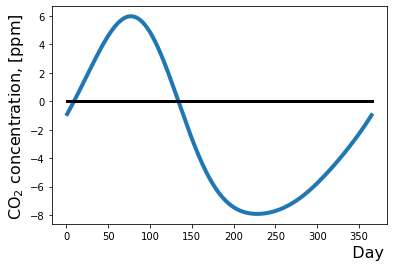

In [239]:
year1 = [0] * 365
year2 = [0] * 365
year3 = [0] * 365
year4 = [0] * 365
year5 = [0] * 365
year6 = [0] * 365

dd = [0] * 365
for i in range(365):
    dd[i] = i+1
    #year[i] = (func1[i] + func1[i+365] + func1[i+365*2] + func1[i+365*3] + func1[i+365*4] + func1[i+365*5]) / 6 - (fp[1] + 2014.5*fp[0])
    year1[i] = func1[i]- (fp[1] + 2014.5*fp[0])
    year2[i] = func1[i+365]- (fp[1] + 2014.5*fp[0])
    year3[i] = func1[i+365 * 2]- (fp[1] + 2014.5*fp[0])
    year4[i] = func1[i+365 * 3]- (fp[1] + 2014.5*fp[0])
    year5[i] = func1[i+365 * 4]- (fp[1] + 2014.5*fp[0])
    year6[i] = func1[i+365 * 5]- (fp[1] + 2014.5*fp[0])
    
black_li = [0] * 365
    
plt.plot(dd,year1,  linewidth=4) #color = 'limegreen',
plt.plot(dd,black_li, color = 'black', linewidth=3)
plt.ylabel('СО$_{2}$ concentration, [ppm] ', size=16)
plt.xlabel('                                                          Day',size=16)

plt.savefig('график сезонного хода c гармониками относящимися к долгосрочному тренду среднее за 2012.png', dpi=600) 
plt.show()

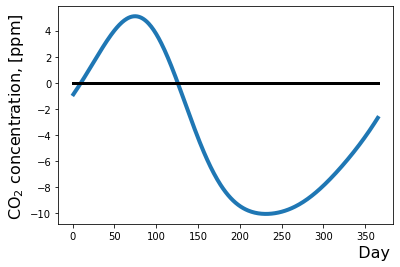

In [240]:
black_li = [0] * 365
    
plt.plot(dd,year2,  linewidth=4) #color = 'limegreen',
plt.plot(dd,black_li, color = 'black', linewidth=3)
plt.ylabel('СО$_{2}$ concentration, [ppm] ', size=16)
plt.xlabel('                                                          Day',size=16)

plt.savefig('график сезонного хода c гармониками относящимися к долгосрочному тренду среднее за 2013.png', dpi=600) 
plt.show()

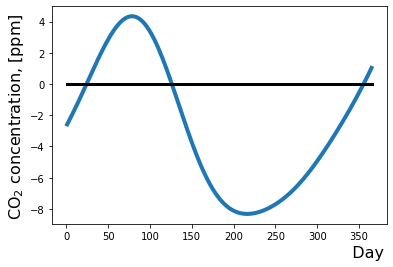

In [241]:
black_li = [0] * 365
    
plt.plot(dd,year3,  linewidth=4) #color = 'limegreen',
plt.plot(dd,black_li, color = 'black', linewidth=3)
plt.ylabel('СО$_{2}$ concentration, [ppm] ', size=16)
plt.xlabel('                                                          Day',size=16)

plt.savefig('график сезонного хода c гармониками относящимися к долгосрочному тренду среднее за 2014.png', dpi=600) 
plt.show()

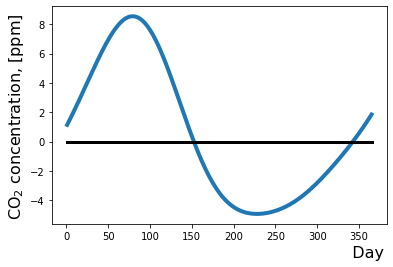

In [242]:
black_li = [0] * 365
    
plt.plot(dd,year4,  linewidth=4) #color = 'limegreen',
plt.plot(dd,black_li, color = 'black', linewidth=3)
plt.ylabel('СО$_{2}$ concentration, [ppm] ', size=16)
plt.xlabel('                                                          Day',size=16)

plt.savefig('график сезонного хода c гармониками относящимися к долгосрочному тренду среднее за 2015.png', dpi=600) 
plt.show()

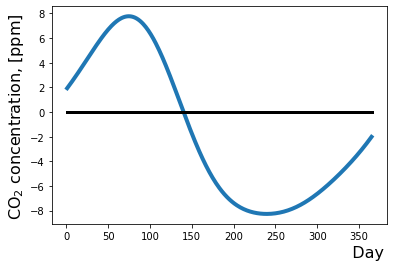

In [243]:
black_li = [0] * 365
    
plt.plot(dd,year5,  linewidth=4) #color = 'limegreen',
plt.plot(dd,black_li, color = 'black', linewidth=3)
plt.ylabel('СО$_{2}$ concentration, [ppm] ', size=16)
plt.xlabel('                                                          Day',size=16)

plt.savefig('график сезонного хода c гармониками относящимися к долгосрочному тренду среднее за 2016.png', dpi=600) 
plt.show()

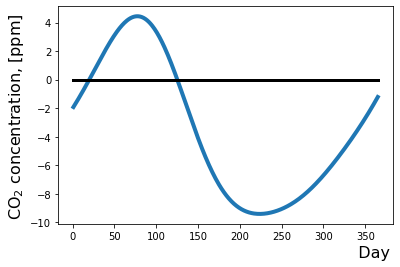

In [244]:
black_li = [0] * 365
    
plt.plot(dd,year6,  linewidth=4) #color = 'limegreen',
plt.plot(dd,black_li, color = 'black', linewidth=3)
plt.ylabel('СО$_{2}$ concentration, [ppm] ', size=16)
plt.xlabel('                                                          Day',size=16)

plt.savefig('график сезонного хода c гармониками относящимися к долгосрочному тренду среднее за 2017.png', dpi=600) 
plt.show()

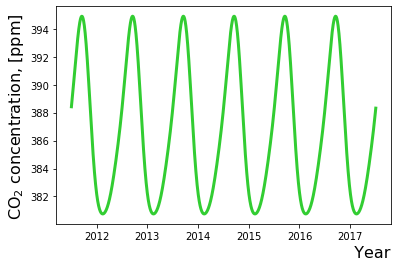

In [230]:
day_graph = [0] * H
func1 = [0] * H
dateonday1 = [0] * H

w5 = [0.00045620438, -1.07361434, -1.05999879] #2192
w6 = [0.000912408759, 0.621081633, 1.58731791] #1096


for i in range(H): 
    day_graph[i] = (i+1)/(365) + 2011.5
    func1[i] = func[i] - fp[0] * (i+1)/365
    dateonday1[i] = dateonday[i] - fp[0] * (i+1)/365
    func1[i] -= w5[1] * math.cos(2* math.pi *w5[0] * (i+1)) + w5[2] * math.sin(2* math.pi *w5[0] * (i+1))
    func1[i] -= w6[1] * math.cos(2* math.pi *w6[0] * (i+1)) + w6[2] * math.sin(2* math.pi *w6[0] * (i+1))
    
#plt.plot(day_graph,dateonday1, 'x',  color = 'blue')
#plt.plot(day,linia, color ='red', linewidth=3)
plt.plot(day_graph,func1, color = 'limegreen', linewidth=3)
plt.ylabel('СО$_{2}$ concentration, [ppm] ', size=16)
plt.xlabel('                                                          Year',size=16)

plt.savefig('график сезонного хода без гармоник относящихся к долгосрочному тренду.png', dpi=600) 
plt.show()

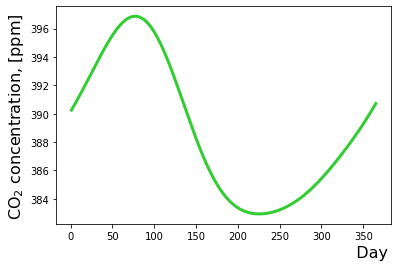

In [231]:
year = [0] * 365
dd = [0] * 365
for i in range(365):
    dd[i] = i+1
    year[i] = (func1[i] + func[i+365] + func[i+365*2] + func[i+365*3] + func[i+365*4] + func[i+365*5]) / 6 #- (fp[1] + 2011.5*fp[0]


black_li = [0] * 365
    
plt.plot(dd,year, color = 'limegreen', linewidth=3)
#plt.plot(dd,black_li, color = 'black', linewidth=3)
plt.ylabel('СО$_{2}$ concentration, [ppm] ', size=16)
plt.xlabel('                                                          Day',size=16)

plt.savefig('график сезонного хода без гармоник относящимися к долгосрочному тренду среднее за все года.png', dpi=600) 
plt.show()

3.6343857739468315


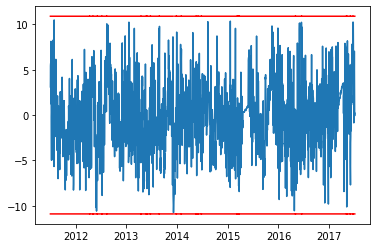

In [203]:
hist1 = []
dayh = []
for i in range(H):
    if dateonday[i] > 0:
        hist1.append(dateonday[i] - func[i])
        dayh.append(day[i])

st_err = np.std(hist1)
print(st_err)

f1 = [0] * H
f2 = [0] * H

for i in range(H):
    f1[i] = 3 * st_err
    f2[i] = -3 * st_err

plt.plot(dayh,hist1)
plt.plot(day,f1, color = 'red')
plt.plot(day,f2, color = 'red')
#plt.plot(day,func, color = 'magenta', linewidth=3)
plt.show()

0


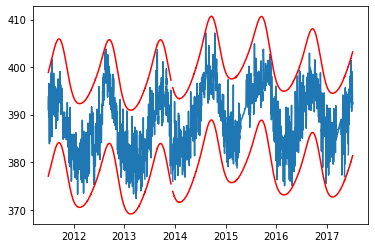

In [170]:
fverh = [0] * H
fniz = [0] * H
geiger = 0
for i in range(H):
    fverh[i] = func[i] + 3 * st_err
    fniz[i] = func[i] - 3 * st_err
    if ((dateonday[i] > fverh[i]) or (dateonday[i] < fniz[i])):
        geiger += 1
        dateonday[i] = np.nan
        day[i] = np.nan

print(geiger)

plt.plot(day, dateonday)
plt.plot(day,fverh, color = 'red')
plt.plot(day,fniz, color = 'red')

# дальше не надо читать.

In [112]:
dateonday1 = []
day1 = []

for i in range(H):
    if dateonday[i] > 0 :
        dateonday1.append(dateonday[i])
        day1.append(day[i])

c:\users\валентин\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  """Entry point for launching an IPython kernel.
c:\users\валентин\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  


Параметры модели: [ 6.58604177e-01 -9.36519287e+02]
 
0.6586 x - 936.5


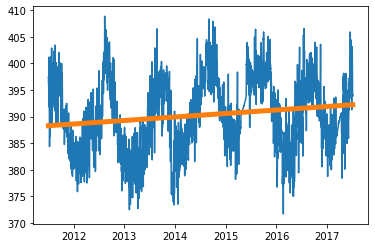

In [113]:
fx = sp.linspace(day1[0], day1[-1], 1000)
fp, residuals, rank, sv, rcond = sp.polyfit(day1, dateonday1, 1, full=True)
print("Параметры модели: %s" % fp)
#функция-полином, если её напечатать, то увидите математическое выражение
f = sp.poly1d(fp)
print(f)
#рисуем график модельной функции

plt.plot(day1,dateonday1)
plt.plot(fx, f(fx), linewidth=5)
plt.show()

In [117]:
raw_data = {'t':day,'data':dateonday}

df = pd.DataFrame(raw_data, columns=['t', 'data'])
df.to_csv('усредненные за дневной период данные4.csv')

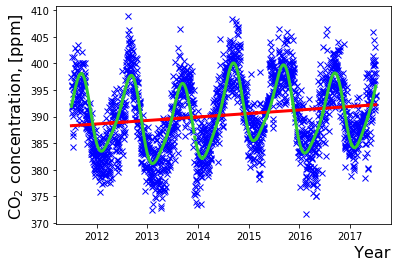

In [139]:
w1 = [0.00273722628, 4.11740705, 6.0209819] #частота, косинус, синус
w2 = [0.000912408759, 0.807189469, 1.69376015]
w3 = [0.00547445255, -1.39485597, 0.268817633]

linia = [0] * H
func= [0] * H
for i in range(H):
    func[i] = w1[1] * math.cos(2* math.pi *w1[0] * (i+1)) + w1[2] * math.sin(2* math.pi *w1[0] * (i+1))
    func[i] += w2[1] * math.cos(2* math.pi *w2[0] * (i+1)) + w2[2] * math.sin(2* math.pi *w2[0] * (i+1))
    func[i] += w3[1] * math.cos(2* math.pi *w3[0] * (i+1)) + w3[2] * math.sin(2* math.pi *w3[0] * (i+1))
    func[i] += fp[0] * (i+1)/365 + fp[1] + 2011.5*fp[0]
    linia[i] = fp[0] * (i+1)/365 + fp[1] + 2011.5*fp[0]

plt.plot(day,dateonday, 'x',  color = 'blue')
plt.plot(day,linia, color ='red', linewidth=3)
plt.plot(day,func, color = 'limegreen', linewidth=3)
plt.ylabel('СО$_{2}$ concentration, [ppm] ', size=16)
plt.xlabel('                                                          Year',size=16)

plt.savefig('график.png', dpi=600) 
plt.show()

4.1628686212856145


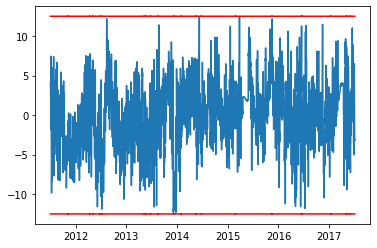

In [119]:
hist1 = []
dayh = []
for i in range(H):
    if dateonday[i] > 0:
        hist1.append(dateonday[i] - func[i])
        dayh.append(day[i])

st_err = np.std(hist1)
print(st_err)

f1 = [0] * H
f2 = [0] * H

for i in range(H):
    f1[i] = 3 * st_err
    f2[i] = -3 * st_err

plt.plot(dayh,hist1)
plt.plot(day,f1, color = 'red')
plt.plot(day,f2, color = 'red')
#plt.plot(day,func, color = 'magenta', linewidth=3)
plt.show()

0


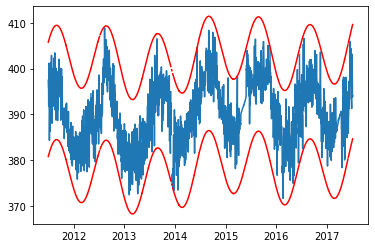

In [120]:
fverh = [0] * H
fniz = [0] * H
geiger = 0
for i in range(H):
    fverh[i] = func[i] + 3 * st_err
    fniz[i] = func[i] - 3 * st_err
    if ((dateonday[i] > fverh[i]) or (dateonday[i] < fniz[i])):
        geiger += 1
        dateonday[i] = np.nan
        day[i] = np.nan

print(geiger)

plt.plot(day, dateonday)
plt.plot(day,fverh, color = 'red')
plt.plot(day,fniz, color = 'red')